In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, LSTM
from keras.layers import TimeDistributed
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
from keras.callbacks import ModelCheckpoint
# f%pip install keras
from scipy import stats

In [118]:
XchTrain = np.load("trainX.npy")
YTrain = np.load("trainY.npy")
XchVal = np.load("valX.npy")
YVal = np.load("valY.npy")
XchTest = np.load("testX.npy")
YTest = np.load("testY.npy")
# making test and train labels one hot
YintTrain = np.int64(YTrain)
YhotTrain = np.zeros((YTrain.shape[0], 6))
YhotTrain[np.arange(YTrain.shape[0]), YintTrain] = 1

YintTest = np.int64(YTest)
YhotTest = np.zeros((YTest.shape[0], 6))
YhotTest[np.arange(YTest.shape[0]), YintTest] = 1

YintVal = np.int64(YVal)
YhotVal = np.zeros((YVal.shape[0], 6))
YhotVal[np.arange(YVal.shape[0]), YintVal] = 1

YhotTest = np.repeat(YhotTest[:, :, np.newaxis], 30, axis=2)
YhotTest = np.swapaxes(YhotTest, 1, 2)

YhotVal = np.repeat(YhotVal[:, :, np.newaxis], 30, axis=2)
YhotVal = np.swapaxes(YhotVal, 1, 2)

YhotTrain = np.repeat(YhotTrain[:, :, np.newaxis], 30, axis=2)
YhotTrain = np.swapaxes(YhotTrain, 1, 2)

In [119]:
print (XchTrain.shape)
print (YhotTrain.shape)
print (XchVal.shape)
print (YhotVal.shape)
print (XchTest.shape)
print (YhotTest.shape)

(5776, 30, 33, 2)
(5776, 30, 6)
(1792, 30, 33, 2)
(1792, 30, 6)
(1690, 30, 33, 2)
(1690, 30, 6)


In [120]:
def get_model():
    model = Sequential([
        TimeDistributed(Conv1D(16,3, activation='elu', padding = "same"),input_shape=XchTrain.shape[1:]),
        TimeDistributed(BatchNormalization()),
        # TimeDistributed(MaxPooling1D()),
        TimeDistributed(Dropout(0.5)),
        # TimeDistributed(Conv1D(64,3, activation='relu',padding = "same")),
        BatchNormalization(),
        #TimeDistributed(Dropout(0.8)),
        TimeDistributed(Flatten()),
        #TimeDistributed(Dense(30,activation='softmax')),  
        LSTM(20,unit_forget_bias = 0.5, return_sequences = True),
        TimeDistributed(Dense(6,activation='softmax'))        
    ])
    adam = Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])
    return model



In [121]:
model = get_model()
filepath= "weights/" +"val1" + "-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model_history = model.fit(XchTrain, YhotTrain, epochs=100, batch_size=32, callbacks=callbacks_list, validation_data = (XchVal, YhotVal))

Epoch 1/100
181/181 [==============================] - ETA: 0s - loss: 1.0863 - accuracy: 0.6882
Epoch 1: val_accuracy improved from -inf to 0.32502, saving model to weights\val1-01-0.3250.hdf5
181/181 [==============================] - 16s 59ms/step - loss: 1.0863 - accuracy: 0.6882 - val_loss: 1.3930 - val_accuracy: 0.3250
Epoch 2/100


c:\Users\Kaustav Dasgupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


181/181 [==============================] - ETA: 0s - loss: 0.4777 - accuracy: 0.9371
Epoch 2: val_accuracy improved from 0.32502 to 0.95800, saving model to weights\val1-02-0.9580.hdf5
181/181 [==============================] - 9s 51ms/step - loss: 0.4777 - accuracy: 0.9371 - val_loss: 0.5389 - val_accuracy: 0.9580
Epoch 3/100
181/181 [==============================] - ETA: 0s - loss: 0.3116 - accuracy: 0.9552
Epoch 3: val_accuracy improved from 0.95800 to 0.99195, saving model to weights\val1-03-0.9919.hdf5
181/181 [==============================] - 9s 50ms/step - loss: 0.3116 - accuracy: 0.9552 - val_loss: 0.1829 - val_accuracy: 0.9919
Epoch 4/100
180/181 [============================>.] - ETA: 0s - loss: 0.2359 - accuracy: 0.9647
Epoch 4: val_accuracy did not improve from 0.99195
181/181 [==============================] - 8s 46ms/step - loss: 0.2360 - accuracy: 0.9647 - val_loss: 0.1287 - val_accuracy: 0.9919
Epoch 5/100
180/181 [============================>.] - ETA: 0s - loss: 0.1

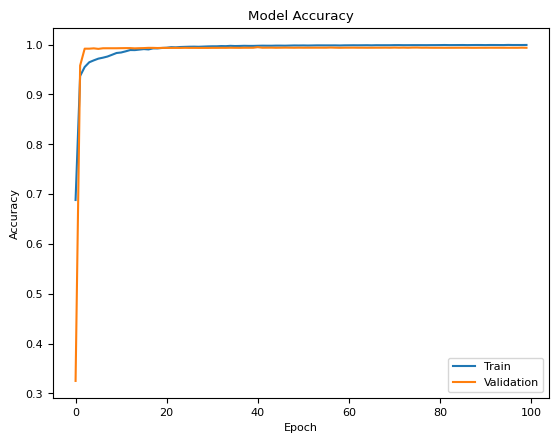

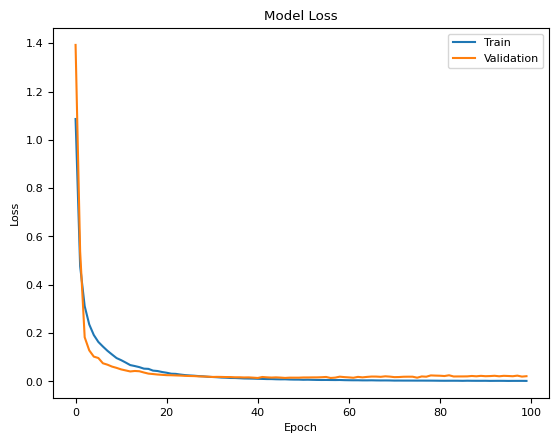

In [122]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
#plt.savefig('accHigh.svg')

# # Plot loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
#plt.savefig('lossHigh.svg')

In [123]:
model = get_model()
#load best weights from current training
model.load_weights("weights/val1-95-0.9944.hdf5")

In [124]:
preds = model.predict(XchTest)

53/53 [==============================] - 2s 21ms/step


In [125]:
print (preds.shape)

(1690, 30, 6)


In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        cm = cm
        #print("Normalized confusion matrix")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [127]:
Yhot_pred = model.predict(XchTest)
#convert them to class numbers


53/53 [==============================] - 1s 20ms/step


In [128]:
Y_pred = np.argmax(preds, axis = 2)
Y_test = np.argmax(YhotTest, axis = 2)
print (Y_pred.shape)
print (Y_test.shape)

(1690, 30)
(1690, 30)


In [129]:
ans = 0
for i in range(Y_test.shape[0]):    
        for j in range(Y_test.shape[1]):
            if Y_test[i][j] == Y_pred[i][j]:
                ans = ans + 1    
print("Test Accuracy Framewise is")
#print ans
print((ans/float(Y_test.shape[0] * Y_test.shape[1]))*100)


Test Accuracy Framewise is
99.63116370808679


In [130]:
# use polling of 45 frames to get output for the sequence
ans = 0
res = []
act = []
for i in range(Y_test.shape[0]):
    # resTemp = stats.mode(Y_pred[i])
    # actTemp = stats.mode(Y_test[i])
    resTemp = stats.mode(Y_pred[i], keepdims=True)
    actTemp = stats.mode(Y_test[i], keepdims=True)
    res.append(resTemp[0][0])
    act.append(actTemp[0][0])
    if res[i] == act[i]:
        ans = ans + 1
    """for j in range(Y_test.shape[1]):
        if Y_test[i][j] != Y_pred[i][j]:
            print Y_pred[i]
            break"""
                
print ("Test Accuracy with Polling is")
#print ans
print(ans/float(Y_test.shape[0])*100)

Test Accuracy with Polling is
100.0


In [131]:
Y_pred_flat = []
Y_test_flat = []
for i in range(Y_test.shape[0]):    
        for j in range(Y_test.shape[1]):
            Y_pred_flat.append(Y_pred[i][j])
            Y_test_flat.append(Y_test[i][j])

In [132]:
print (res)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [133]:
asanas = {0:'bhujangasan', 1:'padamasan', 2:'shavasan', 3:'tadasan', 4:'trikonasan', 5:'vrikshasan'}
#uncomment for framewise
Y_asanas = np.array([asanas[a] for a in Y_test_flat])
Y_pred_asanas = np.array([asanas[a] for a in Y_pred_flat])
#Y_asanas = np.array([asanas[a] for a in act])
#Y_pred_asanas = np.array([asanas[a] for a in res])
print(Y_asanas)
print(Y_pred_asanas)

['bhujangasan' 'bhujangasan' 'bhujangasan' ... 'vrikshasan' 'vrikshasan'
 'vrikshasan']
['padamasan' 'shavasan' 'shavasan' ... 'vrikshasan' 'vrikshasan'
 'vrikshasan']


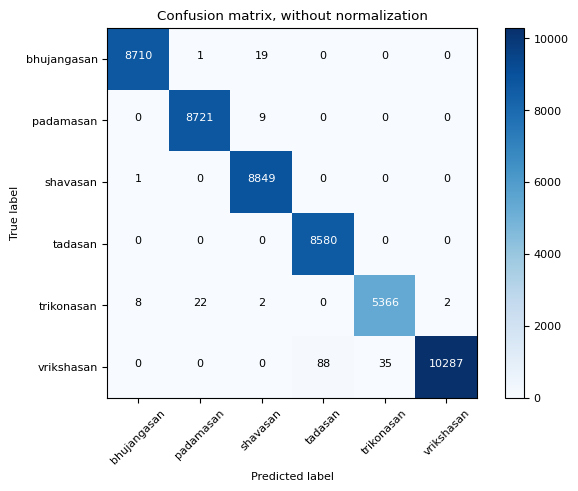

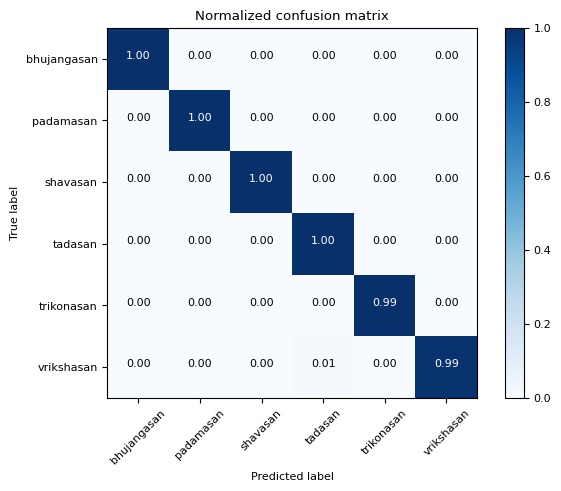

In [134]:
plt.rcParams.update({'font.size': 8})
class_names =[]
for k in range(6):
    class_names.append(asanas[k])
cnf_matrix = confusion_matrix(Y_asanas, Y_pred_asanas)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.savefig('confHighFrame.svg')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('nconfHighFrame.svg')